In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### The ndarray

1. n dimensional array 
2. dtype show the type of the array
3. shape show the shape of the array

In [4]:
#Create ndarray
data1 = [6, 7, 8, 9.5]
arr1 = np.array(data1)  # use np.array to create a new ndarray
# it will also automatically choose the array type unless you specify
data2 = [[1, 2, 3,], [5, 6, 7]]
arr2 = np.array(data2)
arr2.ndim  # check the dimension of the array
arr1.ndim
# all zero array
arr0 = np.zeros(10)
arr11 = np.ones(10)
# for multiple dimension array
np.empty((2,4))
# the empty will not create all zero array but some random trash value
# np.arange is just like range but in ndarray
np.arange(15)
# for numpy the default type is float64

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

#### The functions to create ndarray

In [5]:
# just pass all serilized data like list, array, tuple
np.array([1,2,3,4])
np.array((2,3,4,5))
# make input as a ndarray, if it is already a ndarray, it will not be copied!
np.asarray([1,2,3,4])
# create zero or one array or empyt array
np.zeros(10)
np.ones(10)
# use zeros_like or ones_like or empty array to create ndarray by other array structure
np.zeros_like(data1)
np.ones_like(data2)
# use eye or identity to create identity matrix
np.eye(2)

array([[1., 0.],
       [0., 1.]])

#### the type of ndarray

1. It would make a bunk of memory as specified data type
2. int8, int16, int32, int64 (uint same)
3. float16, float32, float64, float128
4. complex64, complex128, complex256
5. bool
6. object
7. string_ (the length of the string is fixed, you can specify)
9. unicode

In [6]:
arr1 = np.array([1, 2, 3], dtype=np.int32)
arr1.dtype
arr2 = np.array([1, 2, 3], dtype=np.float64)
arr2.dtype

dtype('float64')

In [7]:
# change the type of array 
float_arr = arr1.astype(np.float64)
float_arr.dtype
# if the value of string array is all number your could convert string array to float
numeric_srings = np.array(['1.244', '23.44', '3232'], dtype=np.string_)
numeric_srings.astype(np.float64)
numeric_srings.dtype
# another usage
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)
int_array
# a simple way to show dtype
empty_32 = np.empty(8, dtype='u4')
empty_32
# astype will always create a new array even if the type is same

array([         0, 1075314688,          0, 1075576832,          0,
       1075838976,          0, 1076035584], dtype=uint32)

### Arthmetic with numpy array

1. Array could do vectorization
2. any same shape of array will do arthemetic operation on each array element

In [8]:
arr = np.array([[1, 2, 3], [4, 5, 6]], dtype=np.float64)
arr * arr
arr - arr
# also array opertaions will scalar will do for each element
arr * 5
1 / arr
# operation on different sized of array is called broadcasting, in chapter 12

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

#### Basic indexing and slicing

In [7]:
arr = np.arange(10)
arr[5:8] = 12
arr
# the slicing is on the original array not the copy like list in python
# so the array will be modified if you modify the slices
arr_slice = arr[5:8]
arr_slice[1] = -10
arr
# use copy to get a copy
copy_arr = arr[5:8].copy()
copy_arr[1] = 2
arr
# for 2d or md array
arr2d = np.array([[1, 2, 3],[4, 5, 6], [7, 8, 9]])
arr2d[2]
# the two statements below is same
arr2d[2, 2]
arr2d[2][2]
# row is axis 0 and column is axis 1
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d[0]
old_value = arr3d[0].copy()
arr3d[0] = 42
arr3d[0] = old_value
arr3d[1, 1]

# mupltile dimension array slice
arr2d[:2, :2] # but it will return the same level of dimension array
# use scalar and slice to get a lower level of dimension array
arr2d[0, :2]
# use : to mark all axis
arr2d[:, :2]

array([[1, 2],
       [4, 5],
       [7, 8]])

#### Boolean index

1. Boolean index will always copy the array
2. Slice and index does't copy the array

In [9]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names == 'Bob'
# the length of boolean index should be as same as the length of axis of data
data = np.random.randn(7, 4)
# also could slice the array 
data[names == 'Bob', 2:]
# could not use 'and' or 'or' in boolean index, should use & and |
mask = (names == 'Bob') | (names == 'Will')
data[mask]
# Boolean index will copy the array 

array([[-0.58726036, -0.83108421,  2.30374666, -0.71894052],
       [-0.18224381, -1.26400934,  1.23785479, -0.95103091],
       [ 0.31064416,  1.26214909,  0.16373784, -0.04943991],
       [ 0.67597438, -1.48493899,  1.55383465,  0.41422312]])

#### Fancy Indexing

1. Copy data to new array

In [10]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr
# to choose row by specified order, just put a order array
arr[[4, 3, 0, 6]]
# also use negative index to choose row from tail
arr[[-3, -1, -4]]
# also you could pass a multiple index array to check (row, column) element in one array
arr = np.arange(32).reshape((8, 4))
arr[[1, 5, 7, 2], [0, 3, 1, 2]]
# the result of fancy index is always one-dimension

array([ 4, 23, 29, 10])

#### Array transpose and swapping axes

In [11]:
arr = np.arange(15).reshape((3, 5))
arr.T
# use np.dot to calculate the innner matrix product
np.dot(arr.T, arr)
# for multiple dimension array, you need transpose function to set axis number to do swapping
arr = np.arange(16).reshape((2, 2, 4))
arr.transpose(1, 0, 2)
# swapaxes accept a pair of axes
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

#### Universal Funcitons

1. make operation for each element in the ndarray

In [13]:
arr = np.arange(10)
arr
#unary function
# abs and fabs, fabs is faster for non-complex number
np.fabs(arr)
# sqrt arr ** 0.5
np.sqrt(arr)
# exp to get the natural exponential result
np.exp(arr)
# log, log10, log2, log(1+x)
np.log(arr)
# ceil value - the minimum int that larger than it
np.ceil(arr)
# floor value - the maximum int that smaller than it
np.floor(arr)
# rint will 四舍五入
np.rint(arr)
# modf divide the int part and decimal part into two arrays
np.modf(arr)
# isnan check if any value is NaN
np.isnan(arr)
# isfinite, isinf check finite and infinite
# cos, cosh, sin, sinh
# tan, tanh
# arccos, arccosh, arcsin, arcsinh, arctan, arctanh


#binary function
#add
np.add([1, 2, 3], [2, 3, 4])
#subtract
np.subtract([1, 2, 3], [2, 3, 4])
#multiply
np.multiply([1, 2, 3], [2, 4, 5])
#divide or floor_divide
np.divide([1, 2, 3], [1, 2, 3])
#power, A^B
np.power([1, 2, 3], [1, 2, 3])
#maximum, minimum, fmax, fmin the last two will ignore the NaN
np.maximum([1, 2, 3], [2, -1, 4])
# greater, greater_equal, less, less_equal, equal, not_equal will return a boolean array
# logical_and, logical_or, logical_xor
np.logical_and([1, 2, 3], [0, 2, 3])

/home/gordontttt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


array([False,  True,  True])

#### Array-Oriented Programming with Arrays

1. Vectorization
2. Faster than loop

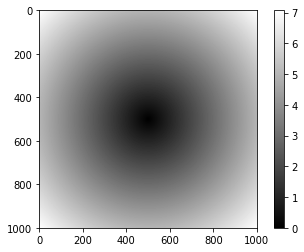

In [36]:
points = np.arange(-5, 5, 0.01)
points
# use meshgrid to generate mesh grid
xs, ys = np.meshgrid(points, points)
z = np.sqrt(xs ** 2 + ys ** 2)
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()


#### Expression conditional logic as Array Operations

In [15]:
# x if condition else y in array we use np.where
xarr = np.array([1.1, 2.2, 3.3, 4.4, 5.5])
yarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
cond = np.array([True, False, True, False, True])
data = np.where(cond, xarr, yarr)
arr = np.random.randn(4, 4)
np.where(arr > 0, 2, arr)

array([[ 2.        , -0.26871662, -0.18357054,  2.        ],
       [-0.60725334, -0.83361042, -1.50633728, -0.83127795],
       [ 2.        ,  2.        ,  2.        ,  2.        ],
       [-0.04594711, -0.74415345,  2.        ,  2.        ]])

### Mathmatic and Statistical Methods

1. sum and mean function accept axis variable to calculate value on that axis
2. 0 row axis
3. 1 column axis

In [16]:
arr = np.random.randn(5, 4)
arr.mean()
arr.std()
arr.sum(1)
arr.var()   # variance function
arr.max()
arr.min()
arr.argmax()  # the index of the max value
arr.argmin()  # the index of the min value
arr.cumsum()

array([ 0.42756727,  1.17213014,  0.33865184,  0.19097416,  1.67402239,
        1.66213787,  0.43819328,  0.62938738, -0.92452265, -0.72539211,
       -0.38543775, -2.35615711, -1.87060369, -2.81618401, -1.93652333,
       -2.3353982 , -0.54240359,  0.24657545, -0.40765351, -0.73631361])

#### For boolean index

In [76]:
# for true will be converted to 1, false will be converted to 0
arr = np.random.randn(100)
(arr > 0).sum()
# any will check if there is an or multiple true 
# all will check if all is true
bools = np.array([True, False, True])
bools.any()
bools.all()
# for non-bool array, any element that is not 0 will be true, 0 will be false

False

#### Sort 

In [118]:
arr = np.random.randn(8)
arr.sort()
# sort mulitple array need to pass the axis number
arr = np.random.randn(8, 5)
print(arr)
# arr.sort(0)
# arr.sort(1)

[[-0.27478373  1.63033525 -0.35781726 -1.32455205 -1.42806698]
 [-1.20640491 -0.84139137  0.39759556 -1.51611011 -1.01629247]
 [-0.96865844  1.92976985  1.14116589 -0.45736277  0.08689518]
 [-0.47522906 -1.092085   -0.63999981 -1.29589217  0.15877985]
 [ 0.61500619  2.15395808 -1.4512056   0.54971356  1.09247684]
 [ 0.23504296 -0.43725609 -0.28730709  2.30807634  0.28465502]
 [ 0.0878694   0.034597    0.95978724 -0.53169426 -0.82842191]
 [ 1.71240159 -0.75590034 -0.90244646  0.30595347 -0.25826821]]


In [18]:
arr  = np.array([[4, 2, 3], [-1, 3, 4]])
arr.sort(1)
arr


array([[ 2,  3,  4],
       [-1,  3,  4]])

#### Unique and other set logic

In [21]:
ints = np.array([1, 2, 3, 3, 4, 1, 2 ,2 ])
np.unique(ints) # return ordered result
# in1d will check if the value of an array appears in another array
values = np.array([1, 2, 3])
np.in1d(values, [2, 3, 4, 5, 6, 7])
# intersect1d
np.intersect1d(values, ints)
# union1d
np.union1d(values, ints)
# setdiff1d in x but not in y
np.setdiff1d(ints, values)
# setxor1d(x, y) either in x or y
np.setxor1d(ints, values)

array([4])

#### File input and output

1. Numpy could read binary or text file

In [22]:
# save
arr = np.arange(10)
np.save('save_example', arr) # save to .npy file
# load
result = np.load('save_example.npy')
result
# save multiple array
np.savez('savezip', x=arr, y=result)
!ls
# read likes dictionary 
data = np.load('savezip.npz')
data['x']

'Chapter 2 Introduction.ipynb'			  ipython_log.py
'Chapter 3 Jupyter Notebook Introduction.ipynb'   save_example.npy
'Chapter 4 Numpy Foundation.ipynb'		  savezip.npz
 Data


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### Read text file

In [ ]:
np.loadtxt('test.text', delimiter=',')
np.savetxt('test.text', delimiter=',')

#### Linear Algebra

1. Review the statistical machine learning notes

In [173]:
# matrix dot product
x = np.array([[1, 2, 3], [2, 3, 4]])
y = np.array([[1, 2], [2, 3], [4, 5]])
x.dot(y)
np.dot(x, np.ones(3))

array([6., 9.])

In [23]:
X = np.random.randn(5, 5)
mat = X.T.dot(X)
mat.dot(np.linalg.inv(mat))

array([[ 1.00000000e+00, -2.77555756e-17,  5.55111512e-17,
         8.88178420e-16,  3.33066907e-16],
       [ 1.11022302e-16,  1.00000000e+00,  1.66533454e-16,
         0.00000000e+00,  0.00000000e+00],
       [ 2.22044605e-16,  1.04083409e-16,  1.00000000e+00,
        -1.66533454e-16,  2.77555756e-17],
       [-1.41553436e-15,  1.04083409e-17,  7.28583860e-17,
         1.00000000e+00, -8.32667268e-17],
       [-8.88178420e-16, -1.11022302e-16, -1.11022302e-16,
         1.77635684e-15,  1.00000000e+00]])

#### Example: Random walk

1. np.seed choose seed
2. np.shuffle shuffle an ordered array
3. np.rand generate an sample from even distribution
4. np.randint generate an int from range
5. np.randn generate from statandard normal distribution (pu = 0, sigma = 1) 
6. np.binomial generate from binomial distribution
7. np.normal generate from normal distribution
8. np.bear generate from beta distritubtion
9. np.chisquare generate from chisquare distribution
10. np.uniform generate from [0, 1)

In [24]:
# get normal distribution randrom
samples = np.random.normal(size=(4, 4))
# python random could only generate one sample once
# numpy random is fater
N = 1000000
from random import normalvariate
%timeit [normalvariate(0, 1) for _ in range(N)]

739 ms ± 9.83 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%timeit np.random.normal(size=N)

37.9 ms ± 643 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


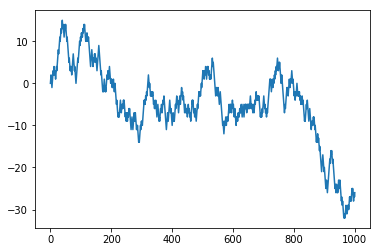

In [26]:
# Random Walk Example
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
plt.plot(walk)

12

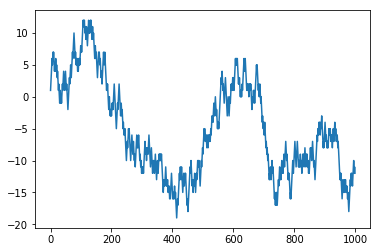

In [27]:
nsteps = 1000
draws = np.random.randint(low=0, high=2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
plt.plot(walk)
walk.min()
walk.max()

In [28]:
(np.abs(walk) > 10).argmax() # True is the largest value

106

In [31]:
# For multiple simulation
nwalks = 5000
nsteps = 1000
draw = np.random.randint(0, 2, size=(nwalks, nsteps))
steps = np.where(draw > 0, 1, -1)
walks = steps.cumsum(1)
hit30 = (np.abs(walks > 30)).any(1)
hit30.sum()
crossing_times = (np.abs(walks[hit30]) >= 30).argmax(1)
crossing_times.mean()

494.76628119293974